# Regression Project to predict home prices in Bangalore 

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

Load the necessary Libraries

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [8]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df1.shape

(13320, 9)

In [12]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### lets drop few coulmns which are not suitable for further analysis 

In [14]:
df2 = df1.drop(['area_type','availability','society'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [17]:
import math
median_bath = math.floor(df2['bath'].mean())
median_bath

2

In [20]:
df2['bath'] = df2['bath'].fillna(median_bath)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [21]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

We have droped all NAN values except bath column( bath we have filled with mean value)

In [23]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

lets see the unique values in Size column

In [25]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

Just to understand any simlarity or dissimality in spelling ( Ex : BHK & Bedroom)

In [26]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

/Users/raju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [28]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

We have house with 43 berdroom, hall and kitchen

In [29]:
df3[df3.bhk>25]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


We can see this error 43 bhk has only 2400 sq ft???

In [30]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [34]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [35]:
df4 = df3.copy()

In [37]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [39]:
df4.head(5)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [42]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
balcony               0
price               186
bhk                   4
Name: 30, dtype: object

In [43]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
balcony             0
price            18.5
bhk                 1
Name: 410, dtype: object

In [44]:
df4.isnull().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [48]:
df4 = df4.dropna()

In [49]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12668 entries, 0 to 13319
Data columns (total 7 columns):
location      12668 non-null object
size          12668 non-null object
total_sqft    12668 non-null float64
bath          12668 non-null float64
balcony       12668 non-null float64
price         12668 non-null float64
bhk           12668 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 791.8+ KB


## Feature Engineering 

lets change price column to price /sq.ft

In [51]:
df5=df4.copy()

In [52]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [53]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


Now lets look into location column

In [55]:
len(df5['location'].unique())

1259

Lets understand the location distribution. we cannot make one hot encoding on all 1259 locations this will become curse of dimensionality. 

In [57]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                              514
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          259
Thanisandra                             233
                                       ... 
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
Kengeri Satellite Town ( BDA SITE)        1
1 Annasandrapalya                         1
Name: location, Length: 1248, dtype: int64

In [61]:
len(location_stats[location_stats<=5])

879

In [63]:
location_stats_lessthan_5 = location_stats[location_stats<=5]
location_stats_lessthan_5

location
Bellari Road                            5
Nagondanahalli                          5
Kattigenahalli                          5
Doddabanahalli                          5
VGP Layout                              5
                                       ..
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
Kengeri Satellite Town KHB Apartment    1
Kengeri Satellite Town ( BDA SITE)      1
1 Annasandrapalya                       1
Name: location, Length: 879, dtype: int64

In [65]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_lessthan_5 else x)

In [66]:
len(df5['location'].unique())

370

we have added less than 5 in numbers areas to others column

### Now lts see outlier detection and removal 

lets check how many sqft for each bhk

In [69]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [70]:
df5.shape

(12668, 8)

In [71]:
##lets remove less than 300sqft per bhk data rows

In [72]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [73]:
df6.shape

(12013, 8)

In [74]:
## lets look price_per_sq_ft column

In [75]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
lets use mean and one standard deviation on the price_sqft dataset

In [76]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9678, 8)

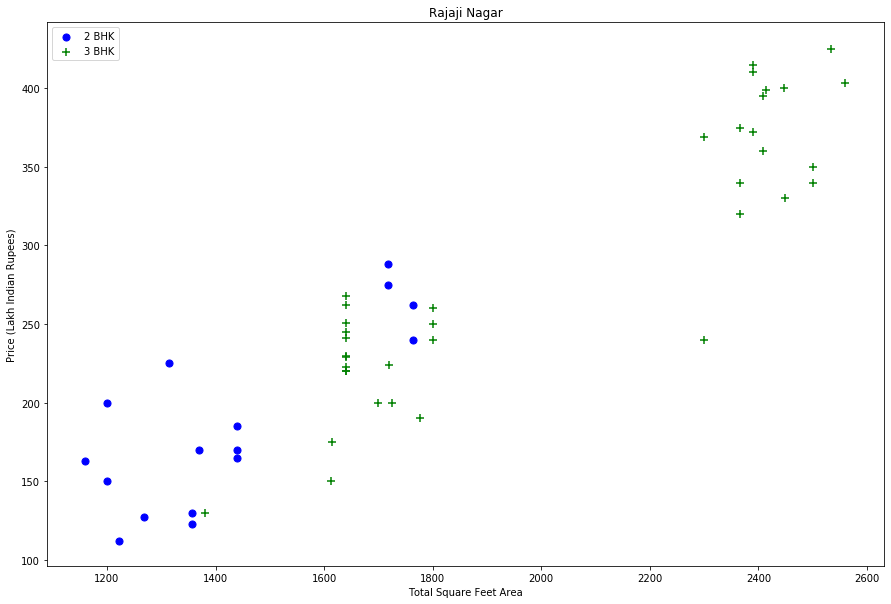

In [77]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [78]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7284, 8)

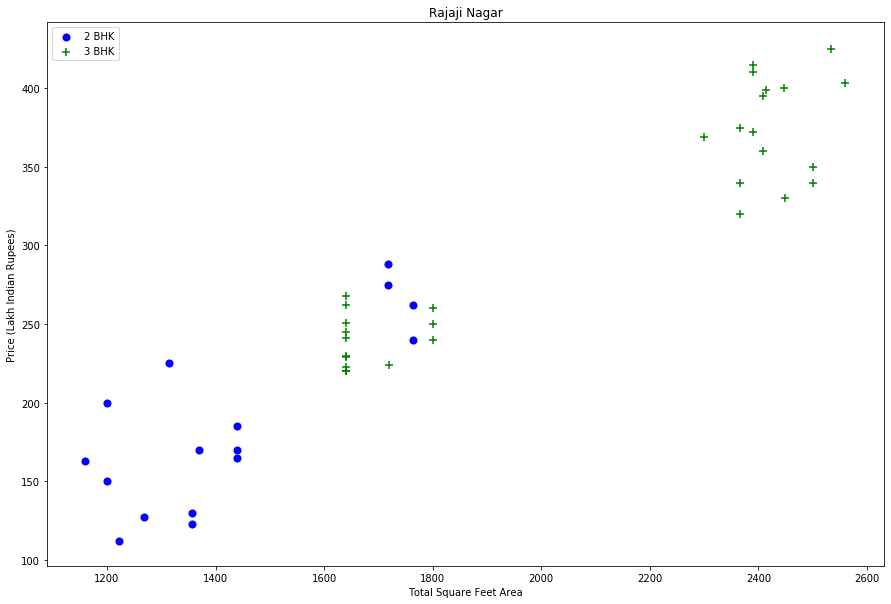

In [79]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

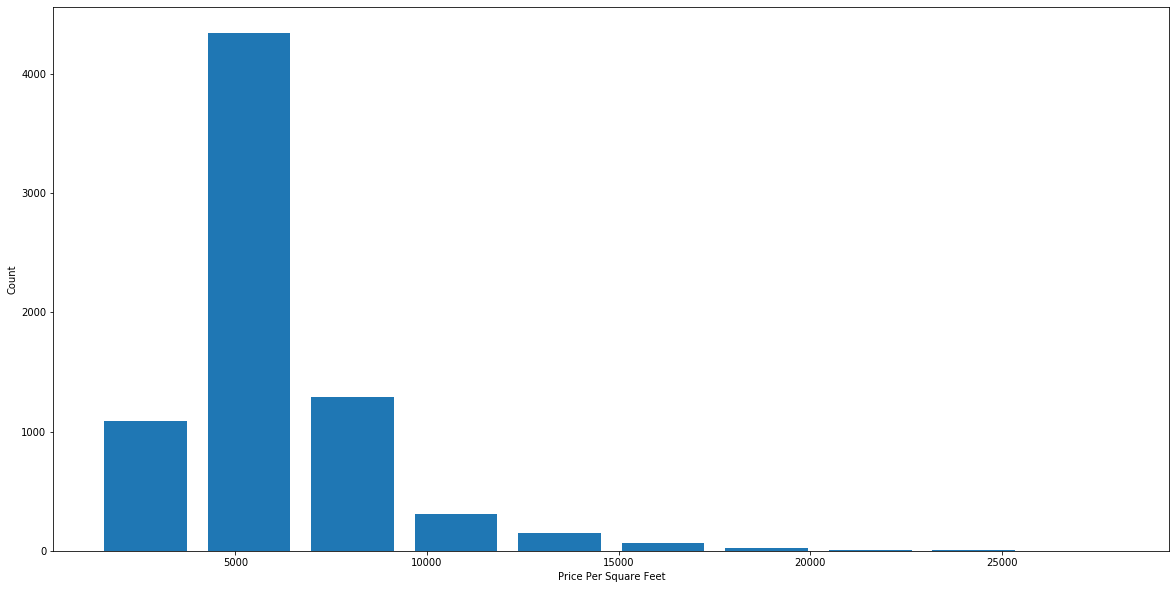

In [80]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Lets look into bathroom coulmn

In [82]:
df8['bath'].unique()

array([ 2.,  4.,  3.,  5.,  1.,  8.,  6.,  7.,  9., 13.])

In [83]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9311,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

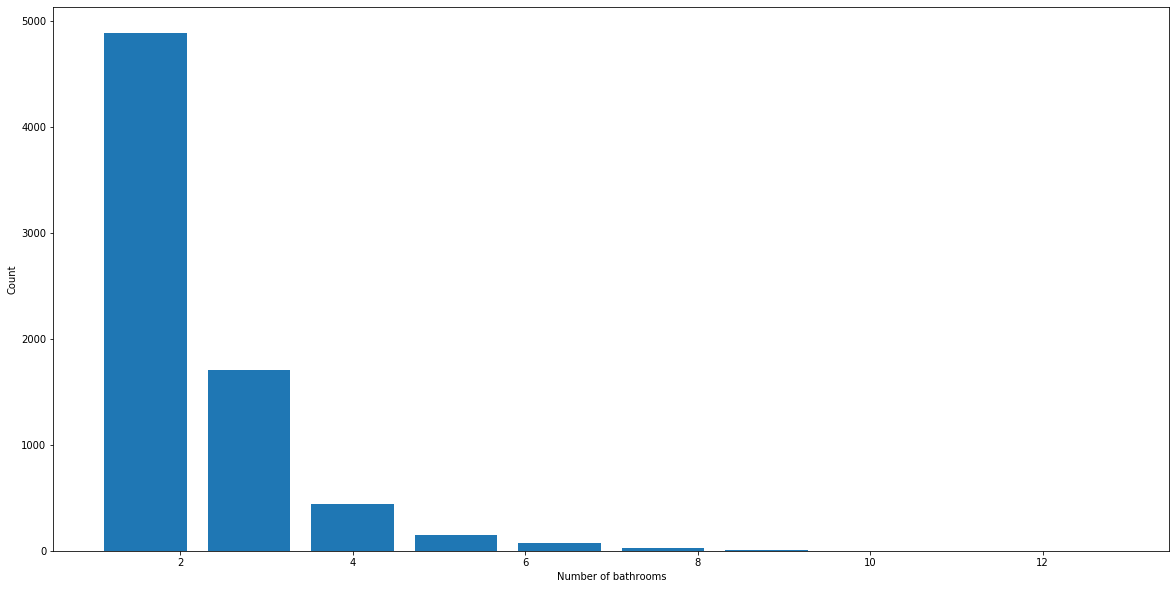

In [84]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [85]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1695,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6599,Sathya Sai Layout,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
7011,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330


these are all outliers 

In [86]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7217, 8)

In [90]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block HRBR Layout,1250.0,2.0,1.0,67.0,2
1,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
2,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3


## Use One Hot Encoding For Location

Lets apply ML model 

In [97]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,3rd Block Hrbr Layout,4th Block Koramangala,4th T block Jayanagar,...,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1st Block HRBR Layout,1250.0,2.0,1.0,67.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df12=df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1250.0,2.0,1.0,67.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2850.0,4.0,1.0,428.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,2.0,194.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,235.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,0.0,130.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df12.shape

(7217, 374)

In [105]:
X=df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1250.0,2.0,1.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2850.0,4.0,1.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,2.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,0.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
y=df12.price
y.head()

0     67.0
1    428.0
2    194.0
3    235.0
4    130.0
Name: price, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [109]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8626908915707426

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [111]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77929509, 0.86568258, 0.8476035 , 0.8490711 , 0.78563362])

## We can see that in 5 iterations we get a highest score 86% 

### Find best model using GridSearchCV

In [112]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.825457,{'normalize': False}
1,lasso,0.653749,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.714064,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [113]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block HRBR Layout',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase JP Nagar', '2nd Phase Judicial Layout',
       ...
       'Vittasandra', 'Volagerekallahalli', 'Whitefield', 'Wilson Garden',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yemlur', 'Yeshwanthpur'],
      dtype='object', length=373)

<h2 style='color:blue'>Test the model for few properties</h2>

In [114]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [117]:
predict_price('Whitefield',1000, 2, 2)

55.88611101303506

In [118]:
predict_price('Whitefield',1000, 3, 3)

59.073004492984566

In [119]:
predict_price('Yelahanka',2000, 3, 3)

122.4815837805052

In [120]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [121]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open( 'columns.json','w')as f:
    f.write(json.dumps(columns))

In [124]:
import os
os.getcwd()

'/Users/raju/Desktop/Greatlearning/GLProjects'